In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os
import pickle

In [109]:
customers_path = os.path.join('C:\\Users\\PC\\Downloads\\New_assignment\\data\\raw\\', 'customers.csv')
orders_path = os.path.join('C:\\Users\\PC\\Downloads\\New_assignment\\data\\raw\\', 'order.csv')

df_cutomers = pd.read_csv(customers_path)
df_orders = pd.read_csv(orders_path)

In [110]:
# Get the data
df_cutomers.head()

,customer_id,name,email
0,8,customer three,customer3@gmail.com
1,9,Shafran Naizer,mshafran13@gmail.com
2,10,Isuri Liyanage,liyanage.isukavi@gmail.com
3,12,Shafran Naizer,shafran@ieee.org
4,13,sss ss,ss@ieee.org


# Feature engineering

In [111]:
# Check data types
df_cutomers.dtypes

customer_id     int64
name           object
email          object
dtype: object

In [112]:
# Check for missing values
df_cutomers.isnull().sum()

customer_id     0
name            6
email          18
dtype: int64

## Data preprocessing of customer dataset

In [113]:
# Remove missing values
df_cutomers.dropna(inplace=True)

In [114]:
# Check for missing values afetr removing
df_cutomers.isnull().sum()

customer_id    0
name           0
email          0
dtype: int64

## Data preprocessing of order dataset

In [115]:
# Chech data types
df_orders.dtypes

id                    int64
display_order_id     object
total_amount          int64
created_at           object
customer_id         float64
dtype: object

In [116]:
# Check for missing values
df_orders.isnull().sum()


id                    0
display_order_id     36
total_amount          0
created_at            0
customer_id         125
dtype: int64

In [117]:
# Remove missing values
df_orders.dropna(inplace=True)

In [118]:
# Check for missing values afetr removing
df_orders.isnull().sum()

id                  0
display_order_id    0
total_amount        0
created_at          0
customer_id         0
dtype: int64

In [119]:
# Change the data type of customer_id in orders to int
df_orders['customer_id'] = df_orders['customer_id'].astype(int)

# created_at column is not in datetime format
df_orders['created_at'] = pd.to_datetime(df_orders['created_at'])

In [120]:
# Check data types
df_orders.dtypes

id                           int64
display_order_id            object
total_amount                 int64
created_at          datetime64[ns]
customer_id                  int32
dtype: object

In [121]:
# Merge the two dataframes
df = pd.merge(df_cutomers, df_orders, on='customer_id')

In [122]:
df.tail()

,customer_id,name,email,id,display_order_id,total_amount,created_at
7298,1268,John Smith,johndoe+100@gmail.com,13518,5OQG,3930,2024-10-16 12:32:16
7299,1269,John Williams,john.williams+1729082505464@gmail.com,13519,6EXK,3930,2024-10-16 12:41:47
7300,1270,Alex Johnson,alex.johnson+1729082517724@gmail.com,13520,XCOO,3930,2024-10-16 12:42:00
7301,1271,Dinuka Kaveen Dominguhewa,dominguhewa98@gmail.com,13521,9SWI,1175,2024-10-17 09:06:00
7302,1271,Dinuka Kaveen Dominguhewa,dominguhewa98@gmail.com,13522,MHZJ,1175,2024-10-23 06:28:41


In [123]:
# Sum all the orders for each customer, excluding datetime columns
df_grouped = df.groupby('customer_id').sum(numeric_only=True)

In [124]:
df_grouped.head()

,id,total_amount
customer_id,,
8,2550,27500
9,2081,6797
10,6882,31200
12,7876,17200
14,57676,384436


In [125]:
# Add name and email columns to the grouped dataframe
df_grouped[['name', 'email']] = df.groupby('customer_id')[['name', 'email']].first()

df_grouped.head()

,id,total_amount,name,email
customer_id,,,,
8,2550,27500,customer three,customer3@gmail.com
9,2081,6797,Shafran Naizer,mshafran13@gmail.com
10,6882,31200,Isuri Liyanage,liyanage.isukavi@gmail.com
12,7876,17200,Shafran Naizer,shafran@ieee.org
14,57676,384436,Shafran nIAZER,shafran@delivergate.com


In [126]:
# Add a new column to the grouped dataframe
df_grouped['total_orders'] = df.groupby('customer_id').count()['id']

df_grouped.head()

,id,total_amount,name,email,total_orders
customer_id,,,,,
8,2550,27500,customer three,customer3@gmail.com,11
9,2081,6797,Shafran Naizer,mshafran13@gmail.com,2
10,6882,31200,Isuri Liyanage,liyanage.isukavi@gmail.com,12
12,7876,17200,Shafran Naizer,shafran@ieee.org,7
14,57676,384436,Shafran nIAZER,shafran@delivergate.com,112


In [127]:
# Create a new column to indicate if a customer is a repeat customer
df_grouped['is_repeat_purchaser'] = df_grouped['total_orders'] > 1

In [128]:
df_grouped.head()

,id,total_amount,name,email,total_orders,is_repeat_purchaser
customer_id,,,,,,
8,2550,27500,customer three,customer3@gmail.com,11,True
9,2081,6797,Shafran Naizer,mshafran13@gmail.com,2,True
10,6882,31200,Isuri Liyanage,liyanage.isukavi@gmail.com,12,True
12,7876,17200,Shafran Naizer,shafran@ieee.org,7,True
14,57676,384436,Shafran nIAZER,shafran@delivergate.com,112,True


In [129]:
# Features and target variable
X = df_grouped.drop(columns=['is_repeat_purchaser'])
y = df_grouped['is_repeat_purchaser']

## Encoding labels

In [135]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'name' and 'email' columns
X['name'] = label_encoder.fit_transform(X['name'])
X['email'] = label_encoder.fit_transform(X['email'])
y = label_encoder.fit_transform(y)

X.head()

,id,total_amount,name,email,total_orders
customer_id,,,,,
8,2550,27500,224,22,11
9,2081,6797,184,387,2
10,6882,31200,85,383,12
12,7876,17200,184,480,7
14,57676,384436,186,476,112


In [138]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model building

In [139]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [140]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy: {np.mean(scores) * 100:.2f}%")

Cross-Validation Accuracy: 98.10%


c:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

## Confusion matrix

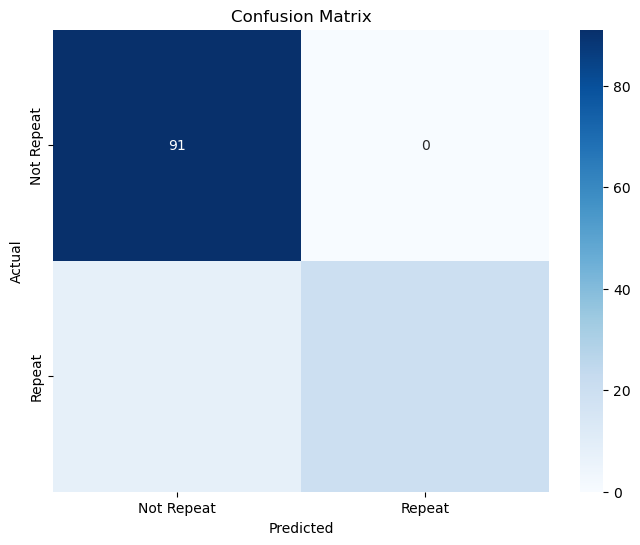

In [141]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Repeat', 'Repeat'], yticklabels=['Not Repeat', 'Repeat'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Model accuracy

In [142]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 93.28%
